# Case Study: Analyzing U.S. Storm Events for Disaster Preparedness 

In this case study, we will analyze storm event data to enhance disaster preparedness efforts in the U.S. We will follow a structured data analysis workflow comprising the following phases:

1. **Ask**: Define the problem and confirm expectations.
2. **Prepare**: Collect and store data for analysis.
3. **Process**: Clean and transform data to ensure integrity.
4. **Analyze**: Use data analysis tools to draw conclusions.
5. **Share**: Interpret and communicate results to make data-driven decisions.
6. **Act**: Put insights to work to address the original problem.

We will utilize the open-source Storm Event Database provided by the National Oceanic and Atmospheric Administration (NOAA), available at [NOAA Storm Events Database](https://www.ncdc.noaa.gov/stormevents/ftp.jsp). This dataset contains comprehensive information about various storm events across the U.S., including details such as event type, location, and impact.

---

## Ask

### Problem Statement
The U.S. experiences various storm events that can impact public safety, property, and infrastructure. Analyzing the patterns and impacts of these storms will provide insights that can inform disaster preparedness and response strategies.

### Key Questions
1. **What types of storm events are most prevalent in the U.S.?**  
   Identify the most common storm events and their geographical distribution.

2. **Where do storm events most frequently occur?**  
   Map the geographical distribution of storm events to identify high-risk areas.

3. **Are certain regions more prone to specific types of storm events?**  
   Analyze the geographic hot spots for storm types to develop tailored regional preparedness plans.

4. **What is the temporal distribution of storm events?**  
   Analyze trends over time to understand seasonal patterns and changes in frequency.

5. **What is the impact of different storm events on injuries, fatalities, and property damage?**  
   Assess the severity of various storm types and their associated risks to prioritize high-risk events for preparedness planning.

6. **How can this analysis inform disaster preparedness initiatives?**  
   Determine actionable insights that can help stakeholders enhance response plans and allocate resources effectively.

---

## Prepare

### Data Sources
For this analysis, we will use the Storm Event Database from National Centers for Environmental Information (NCEI) - National Oceanic and Atmospheric Administration (NOAA). The database currently contains data from January 1950 to June 2024. NCEI receives Storm Data from the National Weather Service (NWS). The NWS receives their information from a variety of sources, which include but are not limited to: county, state and federal emergency management officials, local law enforcement officials, skywarn spotters, NWS damage surveys, newspaper clipping services, the insurance industry and the general public, among others. An effort is made to use the best available information but because of time and resource constraints, information from these sources may be unverified by the NWS. Therefore, when using information from Storm Data, we should be cautious as the NWS does not guarantee the accuracy or validity of the information.
The dataset can be accessed at [NOAA Storm Events Database](https://www.ncdc.noaa.gov/stormevents/ftp.jsp). We will limit the analysis horizon to 2014-2024 to focus on recent trends.

### Data Collection
The relevant files will be downloaded in CSV.GZ format, which is a compressed version of CSV files.

### Data Description
The dataset contains 51 columns with various types of information related to storm events. Below is the data dictionary presented in a table format:


| Column Name        | Example                                                    | Description                                                                                                             |
|:-------------------|:-----------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------|
| begin_yearmonth    | 201212                                                     | The year and month that the event began (%Y%m format).                                                                  |
| begin_day          | 1, 31                                                      | The day of the month that the event began (%-d format).                                                                 |
| begin_time         | 800, 2359                                                  | The time of day that the event began (%-H%M format).                                                                    |
| end_yearmonth      | 201301                                                     | The year and month that the event ended (%Y%m format).                                                                  |
| end_day            | 01                                                         | The day of the month that the event ended (%-d format).                                                                 |
| end_time           | 0001                                                       | The time of day that the event ended (%-H%M format).                                                                    |
| episode_id         | 61280                                                      | ID assigned by NWS to denote the storm episode; may contain multiple events.                                            |
| event_id           | 383097                                                     | ID assigned by NWS for each individual storm event (Primary database key field).                                        |
| state              | GEORGIA                                                    | The state name where the event occurred (ALL CAPS).                                                                     |
| state_fips         | 45                                                         | Unique number assigned to the county by NIST (State FIPS).                                                              |
| year               | 2000                                                       | The four-digit year for the event in this record.                                                                       |
| month_name         | January                                                    | The name of the month for the event (not abbreviated).                                                                  |
| event_type         | Hail                                                       | The type of storm event (spelled out; not abbreviated).                                                                 |
| cz_type            | C                                                          | Indicates whether the event happened in a County/Parish, NWS Public Forecast Zone, or Marine.                           |
| cz_fips            | 245                                                        | The county FIPS number assigned by NIST or NWS Forecast Zone Number.                                                    |
| cz_name            | AIKEN                                                      | Name assigned to the county FIPS number or NWS Forecast Zone.                                                           |
| wfo                | CAE                                                        | The NWS Forecast Office’s area of responsibility in which the event occurred.                                           |
| begin_date_time    | 11-DEC-21 03:50:00                                         | Start date and time of the event (%d-%b-%y %H:%M:%S).                                                                   |
| cz_timezone        | EST-5                                                      | Time Zone for the County/Parish, Zone or Marine Name.                                                                   |
| end_date_time      | 11-DEC-21 03:50:00                                         | End date and time of the event (%d-%b-%y %H:%M:%S).                                                                     |
| injuries_direct    | 1                                                          | Number of injuries directly caused by the weather event.                                                                |
| injuries_indirect  | 0                                                          | Number of injuries indirectly caused by the weather event.                                                              |
| deaths_direct      | 0                                                          | Number of deaths directly caused by the weather event.                                                                  |
| deaths_indirect    | 0                                                          | Number of deaths indirectly caused by the weather event.                                                                |
| damage_property    | 10.00K                                                     | Estimated property damage incurred by the weather event.                                                                |
| damage_crops       | 0.00K                                                      | Estimated damage to crops incurred by the weather event.                                                                |
| source             | Public                                                     | Source reporting the weather event.                                                                                     |
| magnitude          | 0.75                                                       | Measured extent of the magnitude type (only for wind speeds and hail size).                                             |
| magnitude_type     | EG                                                         | Type of magnitude measurement (e.g., wind estimated gust).                                                              |
| flood_cause        | Ice Jam                                                    | Reported cause of the flood.                                                                                            |
| category           |                                                            | Unknown (During the time of downloading this particular file, NCDC has never seen anything provided within this field.) |
| tor_f_scale        | EF0                                                        | Enhanced Fujita Scale describing tornado strength.                                                                      |
| tor_length         | 0.66                                                       | Length of the tornado while on the ground (in miles).                                                                   |
| tor_width          | 25                                                         | Width of the tornado while on the ground (in whole yards).                                                              |
| tor_other_wfo      | DDC                                                        | Continuation of a tornado segment as it crossed from one NWS Forecast Office to another.                                |
| tor_other_cz_state | KS                                                         | Two-character representation for the state name of the continuing tornado segment.                                      |
| tor_other_cz_fips  | 41                                                         | FIPS number of the county for the continuing tornado segment.                                                           |
| tor_other_cz_name  | DICKINSON                                                  | Name of the county for the continuing tornado segment.                                                                  |
| begin_range        | 0.59                                                       | Distance to the nearest tenth of a mile to the location referenced.                                                     |
| begin_azimuth      | ENE                                                        | 16-point compass direction from the location referenced.                                                                |
| begin_location     | PINELAND                                                   | Name of city, town, or village from which the range is calculated.                                                      |
| end_range          | 0.66                                                       | See begin_range.                                                                                                        |
| end_azimuth        | WNW                                                        | See begin_azimuth.                                                                                                      |
| end_location       | RUSK                                                       | See begin_location.                                                                                                     |
| begin_lat          | 29.7898                                                    | Latitude in decimal degrees of the begin point of the event.                                                            |
| begin_lon          | -98.6406                                                   | Longitude in decimal degrees of the begin point of the event.                                                           |
| end_lat            | 29.7158                                                    | Latitude in decimal degrees of the end point of the event.                                                              |
| end_lon            | -98.7744                                                   | Longitude in decimal degrees of the end point of the event.                                                             |
| episode_narrative  | A strong upper level system over the southern Rockies...   | Narrative depicting the general nature of the episode.                                                                  |
| event_narrative    | Heavy rain caused flash flooding across parts of Wilber... | Narrative providing descriptive details of the individual event.                                                        |

### Data Storage
The data will be stored in a local environment for analysis.

In [118]:
# To begin, let's import all necessary libraries
import pandas as pd
import numpy as np
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import warnings

# Mute FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

import glob


# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [119]:
# In the data folder, we have lots of files. But for this analysis, we only need Storm Details files which have the prefix "StormEvents_details-ftp_v1.0_d".
# So, let's define the file path pattern
file_pattern = "./data/StormEvents_details-ftp_v1.0_d*.csv.gz"

# Get a list of all files matching the pattern
all_files = glob.glob(file_pattern)

# Read and concatenate all files into a single DataFrame
df_list = [pd.read_csv(file, compression='gzip') for file in all_files]
df_details = pd.concat(df_list, ignore_index=True)

# Rename column names to snake case for consistency 
df_details = df_details.clean_names()

# Display the first few rows of the DataFrame
df_details.head()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,year,month_name,event_type,cz_type,cz_fips,cz_name,wfo,begin_date_time,cz_timezone,end_date_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,category,tor_f_scale,tor_length,tor_width,tor_other_wfo,tor_other_cz_state,tor_other_cz_fips,tor_other_cz_name,begin_range,begin_azimuth,begin_location,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source
0,202112,11,349,202112,11,350,165322,999750,TENNESSEE,47,2021,December,Tornado,C,165,SUMNER,OHX,11-DEC-21 03:49:00,CST-6,11-DEC-21 03:50:00,0,0,0,0,10.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,NaN,EF0,1.72,50.0,OHX,TN,189.0,WILSON,3.0,WNW,HUNTERS PT,3.0,NW,HUNTERS PT,36.3178,-86.3235,36.3296,-86.2965,One of the worst tornado outbreaks ever record...,This small EF-0 tornado was determined through...,CSV
1,202112,11,249,202112,11,254,165322,999613,TENNESSEE,47,2021,December,Tornado,C,43,DICKSON,OHX,11-DEC-21 02:49:00,CST-6,11-DEC-21 02:54:00,0,0,0,0,10.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,NaN,EF0,5.41,175.0,NaN,NaN,NaN,NaN,1.0,ENE,TIDWELL,2.0,ESE,BAKERSWORKS,36.0255,-87.3054,36.0736,-87.2330,One of the worst tornado outbreaks ever record...,This tornado developed just southeast of the D...,CSV
2,202112,11,325,202112,11,327,165322,999636,TENNESSEE,47,2021,December,Thunderstorm Wind,C,37,DAVIDSON,OHX,11-DEC-21 03:25:00,CST-6,11-DEC-21 03:27:00,0,0,0,0,250.00K,0.00K,NWS Storm Survey,74.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NW,MAPLEWOOD,2.0,SW,AMQUI,36.2372,-86.7286,36.2572,-86.7035,One of the worst tornado outbreaks ever record...,Severe straight-line winds caused significant ...,CSV
3,202112,11,232,202112,11,239,165322,999604,TENNESSEE,47,2021,December,Tornado,C,81,HICKMAN,OHX,11-DEC-21 02:32:00,CST-6,11-DEC-21 02:39:00,0,0,0,0,50.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,NaN,EF1,8.54,400.0,NaN,NaN,NaN,NaN,4.0,NW,SPOT,4.0,NNW,PINEWOOD,35.9205,-87.6423,35.9725,-87.5068,One of the worst tornado outbreaks ever record...,This tornado touched down in far northwest Hic...,CSV
4,202112,6,724,202112,6,724,165321,999306,TENNESSEE,47,2021,December,Thunderstorm Wind,C,49,FENTRESS,OHX,06-DEC-21 07:24:00,CST-6,06-DEC-21 07:24:00,0,0,0,0,3.00K,0.00K,Social Media,52.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JAMESTOWN,1.0,W,JAMESTOWN,36.4322,-84.9405,36.4322,-84.9405,After some isolated thunderstorms moved across...,A Facebook report indicated trees and power li...,CSV


---

## Process

In [120]:
# Display the DataFrame information
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669746 entries, 0 to 669745
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   begin_yearmonth     669746 non-null  int64  
 1   begin_day           669746 non-null  int64  
 2   begin_time          669746 non-null  int64  
 3   end_yearmonth       669746 non-null  int64  
 4   end_day             669746 non-null  int64  
 5   end_time            669746 non-null  int64  
 6   episode_id          669746 non-null  int64  
 7   event_id            669746 non-null  int64  
 8   state               669746 non-null  object 
 9   state_fips          669746 non-null  int64  
 10  year                669746 non-null  int64  
 11  month_name          669746 non-null  object 
 12  event_type          669746 non-null  object 
 13  cz_type             669746 non-null  object 
 14  cz_fips             669746 non-null  int64  
 15  cz_name             669746 non-nul

In [121]:
# Based on the data dictionary, we can drop the following columns: `category`
df_details.drop(columns=['category'], inplace=True)

In [122]:
# Convert `episode_id` and `event_id` to string type
df_details['episode_id'] = df_details['episode_id'].astype(str)
df_details['event_id'] = df_details['event_id'].astype(str)

# Convert `begin_date_time` and `end_date_time` columns to datetime type. Current data follows the format 11-DEC-21 03:49:00
df_details['begin_date_time'] = pd.to_datetime(df_details['begin_date_time'], format='%d-%b-%y %H:%M:%S')
df_details['end_date_time'] = pd.to_datetime(df_details['end_date_time'], format='%d-%b-%y %H:%M:%S')

# Convert `state_fips`, `month_name`, `event_type`, `cz_type`, `magnitude_type`, `tor_other_cz_state`, `tor_f_scale` to categorical type
df_details['month_name'] = df_details['month_name'].astype('category')
# df_details['event_type'] = df_details['event_type'].astype('category')
df_details['cz_type'] = df_details['cz_type'].astype('category')
df_details['magnitude_type'] = df_details['magnitude_type'].astype('category')
df_details['tor_other_cz_state'] = df_details['tor_other_cz_state'].astype('category')
df_details['tor_f_scale'] = df_details['tor_f_scale'].astype('category')

# Convert `state_fips` to type string with zero-padding to two digits
df_details['state_fips'] = df_details['state_fips'].astype(str).str.zfill(2)

# Convert `tor_other_cz_fips` to integer type
df_details['tor_other_cz_fips'] = df_details['tor_other_cz_fips'].astype('Int64')

In [123]:
# Mapping of state names to their abbreviations
state_abbrev = {
    'ALABAMA': 'AL', 
    'ALASKA': 'AK', 
    'ARIZONA': 'AZ', 
    'ARKANSAS': 'AR', 
    'CALIFORNIA': 'CA', 
    'COLORADO': 'CO',
    'CONNECTICUT': 'CT', 
    'DELAWARE': 'DE', 
    'DISTRICT OF COLUMBIA': 'DC',
    'FLORIDA': 'FL', 
    'GEORGIA': 'GA', 
    'HAWAII': 'HI', 
    'IDAHO': 'ID',
    'ILLINOIS': 'IL', 
    'INDIANA': 'IN', 
    'IOWA': 'IA', 
    'KANSAS': 'KS', 
    'KENTUCKY': 'KY', 
    'LOUISIANA': 'LA',
    'MAINE': 'ME', 
    'MARYLAND': 'MD', 
    'MASSACHUSETTS': 'MA', 
    'MICHIGAN': 'MI', 
    'MINNESOTA': 'MN', 
    'MISSISSIPPI': 'MS',
    'MISSOURI': 'MO', 
    'MONTANA': 'MT', 
    'NEBRASKA': 'NE', 
    'NEVADA': 'NV', 
    'NEW HAMPSHIRE': 'NH', 
    'NEW JERSEY': 'NJ',
    'NEW MEXICO': 'NM', 
    'NEW YORK': 'NY', 
    'NORTH CAROLINA': 'NC', 
    'NORTH DAKOTA': 'ND', 
    'OHIO': 'OH', 
    'OKLAHOMA': 'OK',
    'OREGON': 'OR', 
    'PENNSYLVANIA': 'PA', 
    'RHODE ISLAND': 'RI', 
    'SOUTH CAROLINA': 'SC', 
    'SOUTH DAKOTA': 'SD',
    'TENNESSEE': 'TN', 
    'TEXAS': 'TX', 
    'UTAH': 'UT', 
    'VERMONT': 'VT', 
    'VIRGINIA': 'VA', 
    'WASHINGTON': 'WA',
    'WEST VIRGINIA': 'WV', 
    'WISCONSIN': 'WI', 
    'WYOMING': 'WY'
}

# Create a new column 'state_abbrev' with state abbreviations or 'Not applicable'
df_details['state_abbrev'] = df_details['state'].apply(lambda x: state_abbrev.get(x, 'Not applicable'))

# Display the first few rows to verify the new column
df_details.head()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,year,month_name,event_type,cz_type,cz_fips,cz_name,wfo,begin_date_time,cz_timezone,end_date_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,tor_other_cz_state,tor_other_cz_fips,tor_other_cz_name,begin_range,begin_azimuth,begin_location,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source,state_abbrev
0,202112,11,349,202112,11,350,165322,999750,TENNESSEE,47,2021,December,Tornado,C,165,SUMNER,OHX,2021-12-11 03:49:00,CST-6,2021-12-11 03:50:00,0,0,0,0,10.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,EF0,1.72,50.0,OHX,TN,189,WILSON,3.0,WNW,HUNTERS PT,3.0,NW,HUNTERS PT,36.3178,-86.3235,36.3296,-86.2965,One of the worst tornado outbreaks ever record...,This small EF-0 tornado was determined through...,CSV,TN
1,202112,11,249,202112,11,254,165322,999613,TENNESSEE,47,2021,December,Tornado,C,43,DICKSON,OHX,2021-12-11 02:49:00,CST-6,2021-12-11 02:54:00,0,0,0,0,10.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,EF0,5.41,175.0,NaN,NaN,<NA>,NaN,1.0,ENE,TIDWELL,2.0,ESE,BAKERSWORKS,36.0255,-87.3054,36.0736,-87.2330,One of the worst tornado outbreaks ever record...,This tornado developed just southeast of the D...,CSV,TN
2,202112,11,325,202112,11,327,165322,999636,TENNESSEE,47,2021,December,Thunderstorm Wind,C,37,DAVIDSON,OHX,2021-12-11 03:25:00,CST-6,2021-12-11 03:27:00,0,0,0,0,250.00K,0.00K,NWS Storm Survey,74.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1.0,NW,MAPLEWOOD,2.0,SW,AMQUI,36.2372,-86.7286,36.2572,-86.7035,One of the worst tornado outbreaks ever record...,Severe straight-line winds caused significant ...,CSV,TN
3,202112,11,232,202112,11,239,165322,999604,TENNESSEE,47,2021,December,Tornado,C,81,HICKMAN,OHX,2021-12-11 02:32:00,CST-6,2021-12-11 02:39:00,0,0,0,0,50.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,EF1,8.54,400.0,NaN,NaN,<NA>,NaN,4.0,NW,SPOT,4.0,NNW,PINEWOOD,35.9205,-87.6423,35.9725,-87.5068,One of the worst tornado outbreaks ever record...,This tornado touched down in far northwest Hic...,CSV,TN
4,202112,6,724,202112,6,724,165321,999306,TENNESSEE,47,2021,December,Thunderstorm Wind,C,49,FENTRESS,OHX,2021-12-06 07:24:00,CST-6,2021-12-06 07:24:00,0,0,0,0,3.00K,0.00K,Social Media,52.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1.0,W,JAMESTOWN,1.0,W,JAMESTOWN,36.4322,-84.9405,36.4322,-84.9405,After some isolated thunderstorms moved across...,A Facebook report indicated trees and power li...,CSV,TN


In [124]:
# Check the data information
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669746 entries, 0 to 669745
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   begin_yearmonth     669746 non-null  int64         
 1   begin_day           669746 non-null  int64         
 2   begin_time          669746 non-null  int64         
 3   end_yearmonth       669746 non-null  int64         
 4   end_day             669746 non-null  int64         
 5   end_time            669746 non-null  int64         
 6   episode_id          669746 non-null  object        
 7   event_id            669746 non-null  object        
 8   state               669746 non-null  object        
 9   state_fips          669746 non-null  object        
 10  year                669746 non-null  int64         
 11  month_name          669746 non-null  category      
 12  event_type          669746 non-null  object        
 13  cz_type             669746 no

In [125]:
# Now let check for duplicates in the data
duplicates = df_details.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


That's great news. We have no duplicated rows in our data. Let's proceed to check for missing values in the data.

In [126]:
# Check for missing values in the data
missing_values = df_details.isnull().sum()
print("Missing values in the data:")
missing_values[missing_values > 0].sort_values(ascending=False)

Missing values in the data:


tor_other_cz_name     667758
tor_other_wfo         667758
tor_other_cz_state    667758
tor_other_cz_fips     667758
tor_f_scale           654554
tor_length            654554
tor_width             654554
flood_cause           597354
magnitude_type        416845
magnitude             320801
end_lat               259317
end_lon               259317
begin_range           259317
begin_azimuth         259317
begin_location        259317
end_range             259317
end_azimuth           259317
end_location          259317
begin_lat             259317
begin_lon             259317
event_narrative       140063
damage_property       136418
damage_crops          134127
dtype: int64

We have several columns with missing values. Let's check for the columns with missing values.


Start with `tor_f_scale`, `tor_length`, and `tor_width` columns.
Based on the Data Dictionary provided at the beginning I assume columns like `tor_f_scale`, `tor_length`, and `tor_width` are relevant only for tornado events. It’s expected that these fields would be missing for non-tornado events. Let's prove it.

In [127]:
# Select the tornado-specific columns
tornado_columns = ['tor_f_scale', 'tor_length', 'tor_width']

# Check if any of these columns is populated for `event_type` not containing 'Tornado'
non_tornado = df_details[~df_details['event_type'].str.contains('Tornado', na=False)][tornado_columns].notnull().any(axis=1).sum()

# Check if these columns are NOT all null for event_type containing 'Tornado'
tornado= df_details[df_details['event_type'].str.contains('Tornado', na=False)][tornado_columns].isnull().all(axis=1).sum()

# Output the results
print(f"Number of non-tornado events with tornado-specific columns filled: {non_tornado}")
print(f"Number of tornado events with missing tornado-specific columns: {tornado}")

Number of non-tornado events with tornado-specific columns filled: 0
Number of tornado events with missing tornado-specific columns: 0


The result indicates that there are no missing values in the tornado-specific columns (`tor_f_scale`, `tor_length`, and `tor_width`) for events classified as tornadoes in the dataset. This confirms my assumption that these fields are only populated for tornado events and should not have missing values within that context.

Thus, we don’t need to worry about these missing values in the broader dataset, as they are valid and expected for non-tornado events.

Now, let's move on to `tor_other_cz_name`, `tor_other_wfo`, `tor_other_cz_state`, and `tor_other_cz_fips` columns. Based on the Data Dictionary mentioned above, columns like `tor_other_cz_name`, `tor_other_wfo`, `tor_other_cz_state`, and `tor_other_cz_fips` apply only to tornadoes that cross into other geographical areas. If a tornado travels beyond its initial location, these additional columns should contain data.


In [128]:
# Define the columns related to tornadoes that cross geographical areas
tornado_other_location_cols = ['tor_other_cz_name', 'tor_other_wfo', 'tor_other_cz_state', 'tor_other_cz_fips']

# 1. Prove there are only two outcomes: either all four are null or all four are not null
# Create a mask where either all 4 are null or all 4 are not null
all_null_or_not_null = (
    (df_details[tornado_other_location_cols].isnull().all(axis=1)) | 
    (df_details[tornado_other_location_cols].notnull().all(axis=1))
)

# Check if any rows violate this condition
invalid_rows = df_details[~all_null_or_not_null]

if invalid_rows.empty:
    print("There are no cases where only some of the 'tor_other_*' columns are null/non-null. The assumption holds.")
else:
    print("There are cases where only some of the 'tor_other_*' columns are null/non-null:")
    print(invalid_rows)

# 2. Prove that if the 4 columns are null, event_type is not Tornado, and if not null, event_type is Tornado and the original locations differs from the other locations

# First check if event_type is not Tornado when all 4 columns are null
non_tornado_mismatch = df_details[(df_details[tornado_other_location_cols].notnull().all(axis=1)) & (~df_details['event_type'].str.contains('Tornado', na=False))]

# Check if the initial locations are different from the other locations when the 4 columns are not null and event_type is Tornado
location_mismatch = df_details[(df_details[tornado_other_location_cols].notnull().all(axis=1)) & 
                               (df_details['event_type'].str.contains('Tornado', na=False)) &
                               (df_details['cz_fips'] == df_details['tor_other_cz_fips']) &
                                (df_details['cz_name'] == df_details['tor_other_cz_name']) &
                                (df_details['wfo'] == df_details['tor_other_wfo'])]

# Output the results
if non_tornado_mismatch.empty and location_mismatch.empty:
    print("All conditions hold: tornado events have 'tor_other_*' columns populated and locations differ when these columns are populated.")
else:
    if not non_tornado_mismatch.empty:
        print("There are non-tornado events where 'tor_other_*' columns are populated:")
        print(non_tornado_mismatch[['event_type'] + tornado_other_location_cols])
    if not location_mismatch.empty:
        print("There are tornado events where the initial location equals the other location but 'tor_other_*' columns are populated:")
        print(location_mismatch[['event_id', 'event_type', 'cz_name', 'wfo', 'cz_type', 'cz_fips',] + tornado_other_location_cols])

There are no cases where only some of the 'tor_other_*' columns are null/non-null. The assumption holds.
All conditions hold: tornado events have 'tor_other_*' columns populated and locations differ when these columns are populated.


This means that these columns only contain data when a tornado crosses into a new geographical area. If a tornado stays within one boundary, these columns remain null. This is consistent with the data dictionary and the expected behavior of the dataset.


Next, let's check the `flood_cause` column. The `flood_cause` column is expected to be populated only for events classified as floods. Let's verify this assumption.

In [129]:
# Check if any of the flood events does not have the flood_cause column populated
flood = df_details[df_details['event_type'].str.contains('Flood', na=False)]['flood_cause'].isnull().sum()

# Check if any of the non-flood events have the flood_cause column populated
non_flood = df_details[~df_details['event_type'].str.contains('Flood', na=False)]['flood_cause'].notnull().sum()

# Display the result
print(f"Number of flood events with missing 'flood_cause': {flood}")
print(f"Number of non-flood events with 'flood_cause' filled: {non_flood}")

Number of flood events with missing 'flood_cause': 2700
Number of non-flood events with 'flood_cause' filled: 1409


Let's check what `event_type` values are associated with these exceptions.

In [130]:
# Display the event types for non-flood events with flood_cause filled. Only display rows with count > 0
non_flood_cause = df_details[~df_details['event_type'].str.contains('Flood', na=False) & df_details['flood_cause'].notnull()]['event_type'].value_counts()

# Output the results
non_flood_cause[non_flood_cause > 0]

event_type
Debris Flow    1409
Name: count, dtype: int64

Debris flow can be influenced by several factors, but it typically occurs as a result of **heavy rainfall**. This could explain why the `flood_cause` column is populated for these events. So, no further action here.

In [131]:
# Display the event types for flood events with missing flood_cause
flood_missing_cause = df_details[df_details['event_type'].str.contains('Flood', na=False) & df_details['flood_cause'].isnull()]['event_type'].value_counts()

# Output the results
flood_missing_cause[flood_missing_cause > 0]

event_type
Coastal Flood      2385
Lakeshore Flood     315
Name: count, dtype: int64

Since these flood events with missing `flood_cause` data represent a small portion of the dataset and our analysis does not focus heavily on `flood_cause`, we can retain these missing values as they are.

Now, let's check the `magnitude` column. The `magnitude` column is expected to be populated for events classified as wind or hail. Let's verify this assumption.

In [132]:
# Check non-null magnitude values and their associated event types
non_null_magnitude_events = df_details[df_details['magnitude'].notnull()]['event_type'].value_counts()
print("Event types with non-null magnitude:")
non_null_magnitude_events[non_null_magnitude_events > 0]

Event types with non-null magnitude:


event_type
Thunderstorm Wind           178272
Hail                         95763
High Wind                    38392
Marine Thunderstorm Wind     24362
Strong Wind                  11197
Marine High Wind               602
Marine Hail                    281
Marine Strong Wind              76
Name: count, dtype: int64

In [133]:
# Check for missing values in the magnitude column
missing_magnitude = df_details['magnitude'].isnull().sum()
print(f"Number of missing values in 'magnitude': {missing_magnitude}\n")

# Identify event types with missing magnitude
missing_magnitude_events = df_details[df_details['magnitude'].isnull()]['event_type'].value_counts()
print("Event types with missing magnitude:")
missing_magnitude_events[missing_magnitude_events > 0]

Number of missing values in 'magnitude': 320801

Event types with missing magnitude:


event_type
Flash Flood                   41325
Winter Weather                40129
Winter Storm                  31873
Drought                       31702
Flood                         29658
Heavy Snow                    24229
Tornado                       15192
Heavy Rain                    14871
Heat                          13209
Excessive Heat                11608
Extreme Cold/Wind Chill        9508
Dense Fog                      7529
Cold/Wind Chill                6295
Frost/Freeze                   6087
Blizzard                       5888
High Surf                      4326
Lightning                      3519
Wildfire                       3447
Funnel Cloud                   2959
Tropical Storm                 2664
Ice Storm                      2566
Coastal Flood                  2385
Waterspout                     2088
Debris Flow                    1409
Lake-Effect Snow               1028
Dust Storm                      982
Rip Current                     868
Marine Tropical S

The majority of the event types associated with missing `magnitude` values are not typically associated with specific magnitudes, such as "Flash Flood", "Winter Weather", "Winter Storm" and others while the event types that have non-null values for `magnitude` primarily include "Thunderstorm Wind", "Hail", and "High Wind". This aligns with the definition provided in the Data Dictionary. Thus, the missing values in the `magnitude` column are expected and do not require any further action.

Now, let's check `magnitude_type` column. The `magnitude_type` column is expected to be populated for events classified as wind and has an associated value in the `magnitude` column. Let's verify this assumption.

In [134]:
# Filter rows where magnitude_type is not null
magnitude_type_non_null = df_details[df_details['magnitude_type'].notnull()]

# Check if magnitude_type rows have non-null values in magnitude (Condition 1)
magnitude_missing = magnitude_type_non_null[magnitude_type_non_null['magnitude'].isnull()]

# Define wind-related event types (Condition 2)
wind_event_types = ['Thunderstorm Wind', 'High Wind', 'Strong Wind', 'Marine Thunderstorm Wind', 
                    'Marine High Wind', 'Marine Strong Wind']

# Check if magnitude_type rows have wind-related event types (Condition 2)
non_wind_events = magnitude_type_non_null[~magnitude_type_non_null['event_type'].isin(wind_event_types)]

# Output results
print(f"Rows where magnitude_type is non-null but magnitude is null: {len(magnitude_missing)}")
print(f"Event types with non-null magnitude_type but not wind-related: {len(non_wind_events)}")

# If any violations are found, display the problematic rows
if not magnitude_missing.empty:
    print("Rows with magnitude_type but missing magnitude:")
    print(magnitude_missing[['event_type', 'magnitude_type', 'magnitude']])

if not non_wind_events.empty:
    print("Rows with magnitude_type but non-wind event type:")
    print(non_wind_events[['event_type', 'magnitude_type']])

Rows where magnitude_type is non-null but magnitude is null: 0
Event types with non-null magnitude_type but not wind-related: 0


The `magnitude_type` field is correctly populated only for wind-related events and always has an associated value in the `magnitude` column. No cases were found where `magnitude_type` was non-null without a corresponding value in `magnitude`, or where `magnitude_type` was filled for non-wind events. This confirms that the field is used appropriately in the dataset. So no further action is required.

Now, we can move on to the other columns related to geographical locations (`end_lat`, `end_lon`, `begin_range`, `begin_azimuth`, `begin_location`, `end_range`, `end_azimuth`, `end_location`, `begin_lat`, `begin_lon`). I noticed that they all have the same number of rows with missing values. So, I suspect either all have values or are all null in a row, with no partial cases where some columns are populated while others are not. Let's verify this assumption.

In [135]:
# Select the relevant columns
geo_columns = ['end_lat', 'end_lon', 'begin_range', 'begin_azimuth', 'begin_location', 
               'end_range', 'end_azimuth', 'end_location', 'begin_lat', 'begin_lon']

# Create a subset of just those columns
geo_data = df_details[geo_columns]

# Check if all columns are either fully null or fully populated
all_null_or_all_filled = geo_data.isnull().all(axis=1) | geo_data.notnull().all(axis=1)

# Count the number of rows where some columns are null but others are not
partially_null_rows_count = (~all_null_or_all_filled).sum()

print(f"Number of rows where some columns are null and others are filled: {partially_null_rows_count}")

Number of rows where some columns are null and others are filled: 0


So, that confirms my theory. These columns are either all being populated or all null in a row, with no partial cases where some columns are populated while others are not. This leads to me to believe that these columns are not always required for every event in the dataset. It makes sense that events like droughts or heat waves, for example, may not have clearly defined start or end geographical locations because they can affect broad regions over time rather than specific points.

We can check if the missing geographical data is associated with specific types of events that typically don’t have a clear starting or ending location. 

In [136]:
# Filter rows where the geographical data is missing
missing_geo_data = df_details[geo_data.isnull().all(axis=1)]

# Count the event types for these rows
missing_geo_event_types = missing_geo_data['event_type'].value_counts()

print("Event types associated with missing geographical data:")
missing_geo_event_types[missing_geo_event_types > 0]

Event types associated with missing geographical data:


event_type
Winter Weather                40129
High Wind                     38392
Winter Storm                  31873
Drought                       31702
Heavy Snow                    24229
Heat                          13209
Excessive Heat                11608
Strong Wind                   11197
Extreme Cold/Wind Chill        9508
Dense Fog                      7529
Cold/Wind Chill                6295
Frost/Freeze                   6087
Blizzard                       5888
High Surf                      4326
Wildfire                       3447
Tropical Storm                 2664
Ice Storm                      2566
Coastal Flood                  2385
Lake-Effect Snow               1028
Dust Storm                      982
Rip Current                     868
Marine Tropical Storm           506
Storm Surge/Tide                443
Astronomical Low Tide           353
Avalanche                       348
Sleet                           321
Lakeshore Flood                 315
Hurricane        

This result supports the idea that the missing geographical data (latitude, longitude, range, azimuth, and location) is associated with events that typically don’t have well-defined start and end points.

Given this context, we can conclude that the missing values in these columns are valid and do not require further action.

Now, let's check `event_narrative` column. The `event_narrative` column provides descriptive details of the individual event. Let's verify if the missing values in this column are associated with specific event types.

In [137]:
# Check for missing values in the event_narrative column
missing_narrative_events = df_details[df_details['event_narrative'].isnull()]

# Count the event types in these rows
event_narrative_counts = missing_narrative_events['event_type'].value_counts()

print("Event types with missing event_narrative:")
event_narrative_counts[event_narrative_counts > 0]

Event types with missing event_narrative:


event_type
Hail                        50120
Winter Weather              10362
Drought                     10090
Thunderstorm Wind            8795
Winter Storm                 7033
High Wind                    6845
Heat                         5986
Excessive Heat               4923
Heavy Snow                   4547
Strong Wind                  4363
High Surf                    3844
Extreme Cold/Wind Chill      3549
Dense Fog                    3347
Cold/Wind Chill              3024
Marine Thunderstorm Wind     2499
Frost/Freeze                 2373
Blizzard                     2097
Heavy Rain                   1374
Flood                         886
Wildfire                      787
Lake-Effect Snow              566
Ice Storm                     487
Funnel Cloud                  470
Tropical Storm                363
Flash Flood                   244
Waterspout                    113
Lakeshore Flood               109
Coastal Flood                 105
Marine Tropical Storm          94
Ast

In our analysis, we observed a significant number of missing values in the `event_narrative` column. Given that the narrative primarily provides additional context rather than contributing to the quantitative analysis, we will not be filling in these missing values. Instead, we will retain the existing data as is, ensuring that our analysis remains focused on quantifiable metrics. Furthermore, since the `episode_narrative` column has no missing values, it may serve as a useful supplementary reference, although it will not be included in our main analysis.

According to the National Weather Service (NWS), property and crop damage amounts are broad estimates based on available data at the time of publication. These figures are derived from various sources and are not adjusted for inflation, meaning they reflect the values as entered at the time of the event. The values are not standardized and may vary based on the source of the information. Given these factors, we should treat these values as approximations rather than precise figures. We could reasonably leave the `damage_property` and `damage_crops` columns as they are and impute missing values with 0. 

In [138]:
df_details['damage_property'].value_counts()

damage_property
0.00K      399893
1.00K       21073
5.00K       15700
10.00K      13847
2.00K       12713
            ...  
447.00K         1
32.60M          1
18.80M          1
1.04M           1
222.50M         1
Name: count, Length: 1325, dtype: int64

In [139]:
# Helper function to convert values in 'damage_*' col to float. If the value is not a string, return 0.
def convert_damage(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1000000000
        else:
            return 0
    else:
        return 0

In [140]:
# Apply the conversion
df_details['imputed_damage_property'] = df_details['damage_property'].apply(convert_damage)

# Check for remaining missing values
remaining_missing = df_details['imputed_damage_property'].isnull().sum()
print(f"Remaining missing values in 'imputed_damage_property': {remaining_missing}")

Remaining missing values in 'imputed_damage_property': 0


Similar for `damage_crops` column, we will impute the missing values. We will follow the same approach as we did for the `damage_property` column.

In [141]:
# Convert 'damage_crops' to numeric
df_details['imputed_damage_crops'] = df_details['damage_crops'].apply(convert_damage)

# Check for remaining missing values
remaining_missing_crops = df_details['imputed_damage_crops'].isnull().sum()
print(f"Remaining missing values in 'imputed_damage_crops': {remaining_missing_crops}")

Remaining missing values in 'imputed_damage_crops': 0


Now that we have investigated and handled the issues with the dataset. Let's take a look at the cleaned data. 

In [142]:
# Display the first few rows of the cleaned DataFrame
df_details.head()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,year,month_name,event_type,cz_type,cz_fips,cz_name,wfo,begin_date_time,cz_timezone,end_date_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,tor_other_cz_state,tor_other_cz_fips,tor_other_cz_name,begin_range,begin_azimuth,begin_location,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source,state_abbrev,imputed_damage_property,imputed_damage_crops
0,202112,11,349,202112,11,350,165322,999750,TENNESSEE,47,2021,December,Tornado,C,165,SUMNER,OHX,2021-12-11 03:49:00,CST-6,2021-12-11 03:50:00,0,0,0,0,10.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,EF0,1.72,50.0,OHX,TN,189,WILSON,3.0,WNW,HUNTERS PT,3.0,NW,HUNTERS PT,36.3178,-86.3235,36.3296,-86.2965,One of the worst tornado outbreaks ever record...,This small EF-0 tornado was determined through...,CSV,TN,10000.0,0.0
1,202112,11,249,202112,11,254,165322,999613,TENNESSEE,47,2021,December,Tornado,C,43,DICKSON,OHX,2021-12-11 02:49:00,CST-6,2021-12-11 02:54:00,0,0,0,0,10.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,EF0,5.41,175.0,NaN,NaN,<NA>,NaN,1.0,ENE,TIDWELL,2.0,ESE,BAKERSWORKS,36.0255,-87.3054,36.0736,-87.2330,One of the worst tornado outbreaks ever record...,This tornado developed just southeast of the D...,CSV,TN,10000.0,0.0
2,202112,11,325,202112,11,327,165322,999636,TENNESSEE,47,2021,December,Thunderstorm Wind,C,37,DAVIDSON,OHX,2021-12-11 03:25:00,CST-6,2021-12-11 03:27:00,0,0,0,0,250.00K,0.00K,NWS Storm Survey,74.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1.0,NW,MAPLEWOOD,2.0,SW,AMQUI,36.2372,-86.7286,36.2572,-86.7035,One of the worst tornado outbreaks ever record...,Severe straight-line winds caused significant ...,CSV,TN,250000.0,0.0
3,202112,11,232,202112,11,239,165322,999604,TENNESSEE,47,2021,December,Tornado,C,81,HICKMAN,OHX,2021-12-11 02:32:00,CST-6,2021-12-11 02:39:00,0,0,0,0,50.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,EF1,8.54,400.0,NaN,NaN,<NA>,NaN,4.0,NW,SPOT,4.0,NNW,PINEWOOD,35.9205,-87.6423,35.9725,-87.5068,One of the worst tornado outbreaks ever record...,This tornado touched down in far northwest Hic...,CSV,TN,50000.0,0.0
4,202112,6,724,202112,6,724,165321,999306,TENNESSEE,47,2021,December,Thunderstorm Wind,C,49,FENTRESS,OHX,2021-12-06 07:24:00,CST-6,2021-12-06 07:24:00,0,0,0,0,3.00K,0.00K,Social Media,52.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1.0,W,JAMESTOWN,1.0,W,JAMESTOWN,36.4322,-84.9405,36.4322,-84.9405,After some isolated thunderstorms moved across...,A Facebook report indicated trees and power li...,CSV,TN,3000.0,0.0


In [143]:
# Display the data information
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669746 entries, 0 to 669745
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   begin_yearmonth          669746 non-null  int64         
 1   begin_day                669746 non-null  int64         
 2   begin_time               669746 non-null  int64         
 3   end_yearmonth            669746 non-null  int64         
 4   end_day                  669746 non-null  int64         
 5   end_time                 669746 non-null  int64         
 6   episode_id               669746 non-null  object        
 7   event_id                 669746 non-null  object        
 8   state                    669746 non-null  object        
 9   state_fips               669746 non-null  object        
 10  year                     669746 non-null  int64         
 11  month_name               669746 non-null  category      
 12  event_type      

In [144]:
# Describe the cleaned data
df_details.describe()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,year,cz_fips,begin_date_time,end_date_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,tor_length,tor_width,tor_other_cz_fips,begin_range,end_range,begin_lat,begin_lon,end_lat,end_lon,imputed_damage_property,imputed_damage_crops
count,669746.000000,669746.000000,669746.000000,669746.000000,669746.000000,669746.000000,669746.000000,669746.000000,669746,669746,669746.000000,669746.000000,669746.000000,669746.000000,348945.000000,15192.00000,15192.000000,1988.0,410429.000000,410429.000000,410429.000000,410429.000000,410429.000000,410429.000000,6.697460e+05,6.697460e+05
mean,201909.724999,14.884967,1262.750553,201909.724999,16.502822,1454.988749,2019.038506,108.306182,2019-06-26 03:09:20.556270848,2019-06-27 19:55:32.801539840,0.027030,0.007848,0.009999,0.003491,37.897867,3.16236,196.235153,105.344064,2.440858,2.463415,37.648997,-90.233009,37.647509,-90.226771,3.546832e+05,2.254274e+04
min,201401.000000,1.000000,0.000000,201401.000000,1.000000,0.000000,2014.000000,1.000000,2014-01-01 00:00:00,2014-01-01 03:00:00,0.000000,0.000000,0.000000,0.000000,0.130000,0.01000,1.000000,1.0,0.000000,0.000000,-14.400000,-171.032700,-14.437500,-170.905900,0.000000e+00,0.000000e+00
25%,201611.000000,7.000000,745.000000,201611.000000,9.000000,1051.000000,2016.000000,25.000000,2016-11-07 17:18:45,2016-11-19 06:00:00,0.000000,0.000000,0.000000,0.000000,1.750000,0.50000,50.000000,45.0,1.000000,1.000000,34.310000,-97.260000,34.310000,-97.260000,0.000000e+00,0.000000e+00
50%,201907.000000,15.000000,1434.000000,201907.000000,16.000000,1600.000000,2019.000000,66.000000,2019-07-10 13:00:00,2019-07-10 20:45:00,0.000000,0.000000,0.000000,0.000000,50.000000,1.66000,100.000000,91.0,1.000000,1.000000,38.140000,-89.530000,38.140000,-89.517600,0.000000e+00,0.000000e+00
75%,202204.000000,23.000000,1800.000000,202204.000000,24.000000,1900.000000,2022.000000,123.000000,2022-04-12 18:15:00,2022-04-13 18:54:45,0.000000,0.000000,0.000000,0.000000,52.000000,4.20000,200.000000,143.0,3.000000,3.000000,41.220000,-81.460000,41.218300,-81.450000,0.000000e+00,0.000000e+00
max,202406.000000,31.000000,2359.000000,202406.000000,31.000000,2359.000000,2024.000000,876.000000,2024-06-30 22:44:00,2024-06-30 23:59:00,806.000000,500.000000,100.000000,25.000000,173.000000,41.88000,3960.000000,820.0,185.000000,185.000000,70.375400,151.848400,70.264600,151.858900,1.700000e+10,1.500000e+09
std,308.331723,9.061630,677.789666,308.331723,9.079046,615.305445,3.084325,136.393570,NaN,NaN,1.724955,0.715775,0.307508,0.104672,23.715012,4.14433,296.644097,86.964479,4.563890,4.577299,5.177361,11.722470,5.178816,11.720015,3.648998e+07,2.461845e+06


---

## Analyze

Now that we have cleaned the data, we can proceed with the analysis. We will address the key questions outlined in the Ask phase. Let's start by exploring the distribution of storm events by type.

In [145]:
# Create a helper function to plot a horizontal or vertical barplot
def plot_bar_chart(data, x, y, title, xlabel, ylabel, figsize=(15, 6), rotation=0):
    """
    Plot a bar chart.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data to plot.
    x (str): Column name to display on the x-axis.
    y (str): Column name to display on the y-axis.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    figsize (tuple): Size of the figure.
    rotation (int): Rotation angle for x-axis labels.
    sort_by (str, optional): Column name to sort the data by. If None, use the default order.
    """
    plt.figure(figsize=figsize)

    ax = sns.barplot(x=x, y=y, data=data, palette='colorblind', ci=None, order=data[y] if y else data[x])
    
    # Add labels to the bars. Please note that we can have values ranging from 0 to billions. So, we need to format the values accordingly.
    for p in ax.patches:
        value = p.get_width()
        if value >= 1e9:
            label = f'{value / 1e9:.1f}B'
        elif value >= 1e6:
            label = f'{value / 1e6:.1f}M'
        elif value >= 1e3:
            label = f'{value / 1e3:.1f}K'
        else:
            label = f'{value:.0f}'
        ax.annotate(label, (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')
    
        
    # Make the plot background white
    sns.set_theme(style='white')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

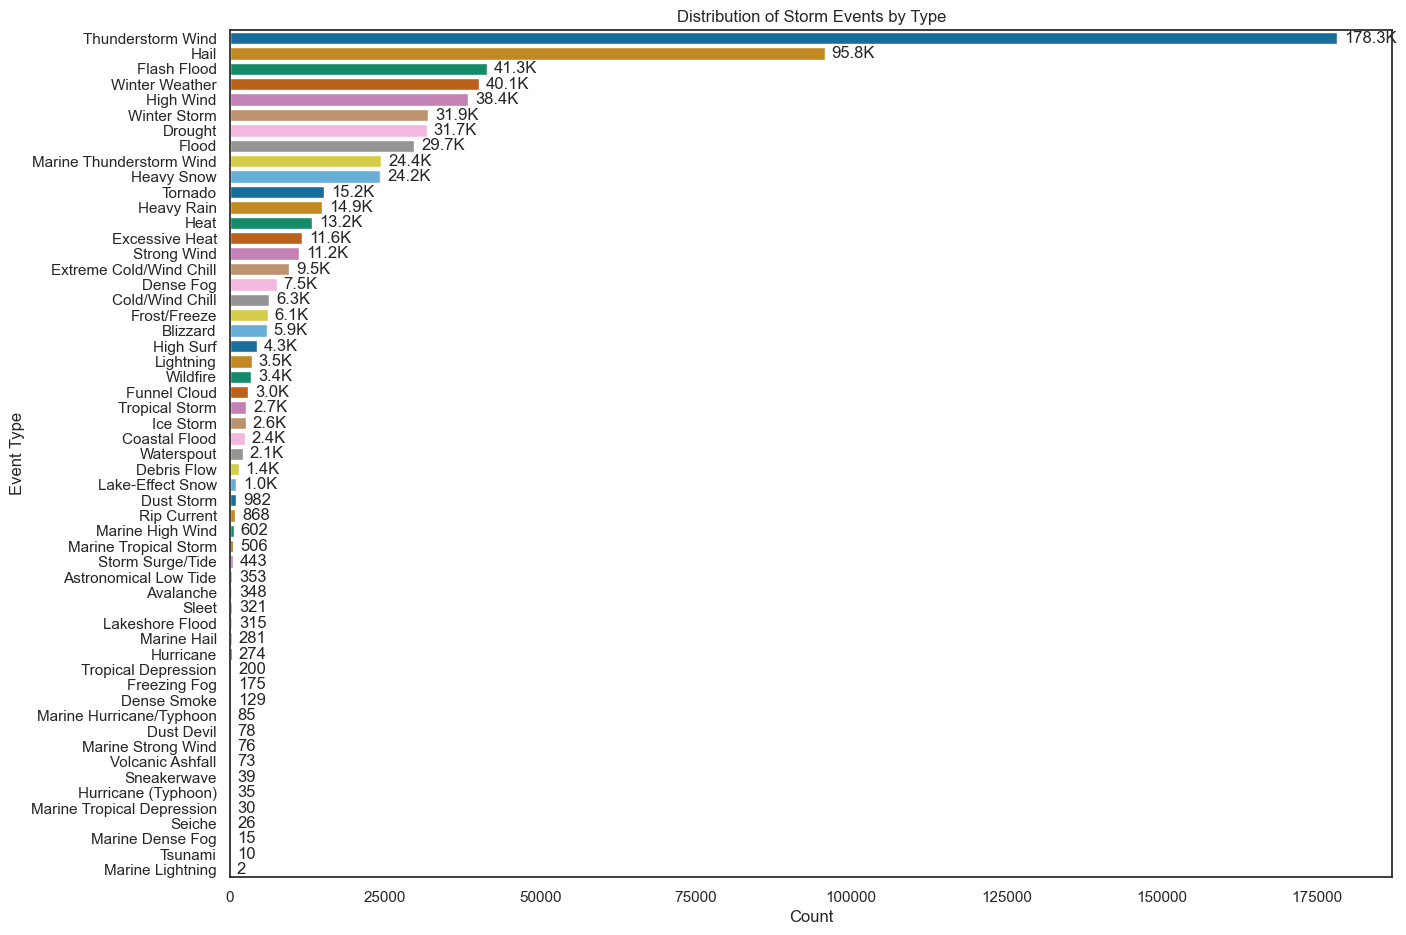

In [146]:
# Plot the distribution of storm events by type sort by count
event_counts = df_details['event_type'].value_counts().reset_index()
event_counts.columns = ['event_type', 'count']

plot_bar_chart(data=event_counts, x='count', y='event_type', title='Distribution of Storm Events by Type', xlabel='Count', ylabel='Event Type', figsize=(15, 11))

Based on the barplot above, we can see that from January 2014 to June 2024, the most common storm events in the dataset are Thunderstorm Wind, Hail, Flood, and Tornado. These events are significant in terms of frequency. But, do they cause the most damage? Let's find out.

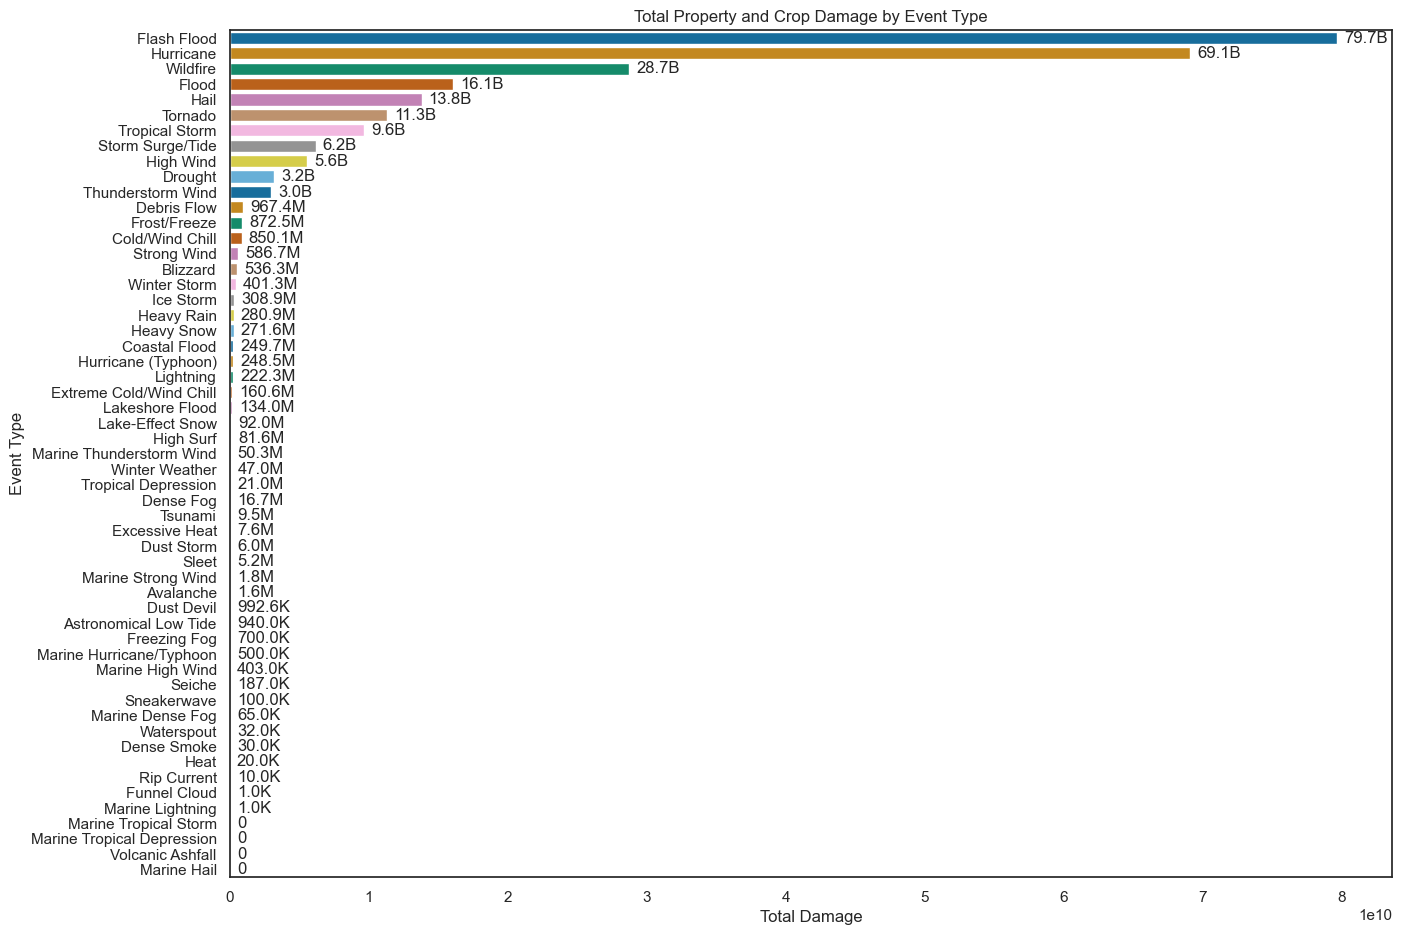

In [147]:
# Plot the distribution of storm events by type sort by total property and crop damage
event_damage = df_details.groupby('event_type')[['imputed_damage_property', 'imputed_damage_crops']].sum()
event_damage['total_damage'] = event_damage.sum(axis=1)
event_damage = event_damage.sort_values('total_damage', ascending=False).reset_index()

plot_bar_chart(data=event_damage, x='total_damage', y='event_type', title='Total Property and Crop Damage by Event Type', xlabel='Total Damage', ylabel='Event Type', figsize=(15, 11))

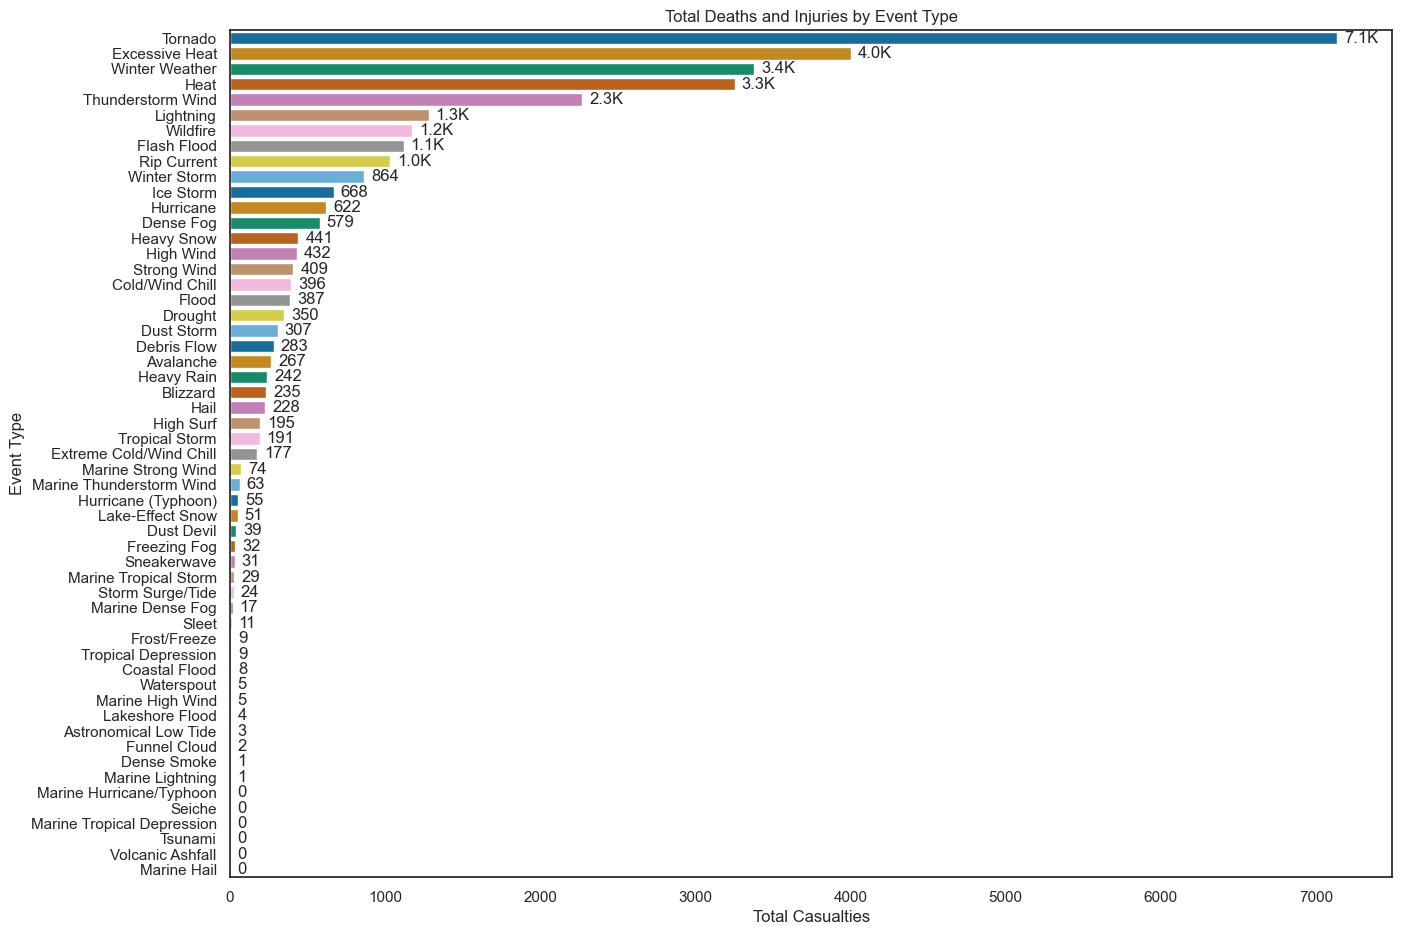

In [148]:
# Plot the distribution of storm events by type sort by total deaths and injuries
event_casualties = df_details.groupby('event_type')[['injuries_direct', 'injuries_indirect', 'deaths_direct', 'deaths_indirect']].sum()
event_casualties['total_casualties'] = event_casualties.sum(axis=1)
event_casualties = event_casualties.sort_values('total_casualties', ascending=False).reset_index()

plot_bar_chart(data=event_casualties, x='total_casualties', y='event_type', title='Total Deaths and Injuries by Event Type', xlabel='Total Casualties', ylabel='Event Type', figsize=(15, 11))

Some valuable insights come to light with the three barplots above.
From January 2014 to June 2024:

1. **Thunderstorm Wind** and **Flash Flood**: 
    - Thunderstorm Wind is the **most common** event type with 178.3K instances. It causes substantial damage in terms of property and crop (\$3.0B) and results in a serious number of injuries and fatalities (2.3K).
    - Flash Flood is the third most common event type with 41.3K instances. It causes the most catastrophic damage in terms of property and crop (\$79.7B) and has notable impact on injuries and fatalities (1.1K).
2. **Hail**, **High Wind**, **Drought**, and **Flood**: Hail, High Wind, Drought, and Flood occur often. Even though they do not cause a significant number of deaths and injuries, they cause a considerable amount of property and crop damage. Hail causes \\$13.8B worth of property and crop damage, Drought causes \\$3.2B worth of property and crop damage, Flood causes \\$16.1B worth of property and crop damage, and High Wind causes \\$5.6B worth of property and crop damage.
3. **Winter Weather**: Winter Weather is quite common with 40.1K instances. It results in a significant number of injuries and fatalities (3.4K) but does not cause as much property and crop damage.
4. **Tornado** and **Wildfire**: Tornado and Wildfire events are less frequent but are the most damaging in terms of deaths and fatalities (7.1K and 1.2K respectively). They also have a high impact on property and crop damage (\\$11.3B and \\$28.7B respectively).
5. **Excessive Heat**, **Heat**, and **Lightning**: Excessive Heat, Heat, and Lightning events are less frequent with 11.6K, 13.2K, and 3.5K instances respectively but cause a significant number of injuries and fatalities (4.0K, 3.3K, and 1.3K respectively).
6. **Hurricane**, **Tropical Storm**, and **Storm Surge/Tide**: Hurricane, Tropical Storm, and Storm Surge/Tide events are less common but have a high impact on property and crop damage (\\$69.1B, \\$9.6B, and \\$6.2B respectively).
7. **Winter Storm**: Although Winter Storm events are common, they do not cause severe damage in terms of property and crop or result in a high number of injuries and fatalities.

With that in mind, let's focus on the following event types to narrow down our analysis: **Thunderstorm Wind, Flash Flood, Hail, High Wind, Drought, Flood, Winter Weather, Tornado, Wildfire, Excessive Heat, Heat, Lightning, Hurricane, Tropical Storm, and Storm Surge/Tide**.

In [149]:
# Create a list of event types to focus on
focus_event_types = ['Thunderstorm Wind', 'Flash Flood', 'Hail', 'High Wind', 'Drought', 'Flood', 'Winter Weather', 
                     'Tornado', 'Wildfire', 'Excessive Heat', 'Heat', 'Lightning', 'Hurricane', 'Tropical Storm', 'Storm Surge/Tide']

# Filter the DataFrame to include only the focus event types
focus_events_df = df_details[df_details['event_type'].isin(focus_event_types)]

focus_events_df

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,year,month_name,event_type,cz_type,cz_fips,cz_name,wfo,begin_date_time,cz_timezone,end_date_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,source,magnitude,magnitude_type,flood_cause,tor_f_scale,tor_length,tor_width,tor_other_wfo,tor_other_cz_state,tor_other_cz_fips,tor_other_cz_name,begin_range,begin_azimuth,begin_location,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source,state_abbrev,imputed_damage_property,imputed_damage_crops
0,202112,11,349,202112,11,350,165322,999750,TENNESSEE,47,2021,December,Tornado,C,165,SUMNER,OHX,2021-12-11 03:49:00,CST-6,2021-12-11 03:50:00,0,0,0,0,10.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,EF0,1.72,50.0,OHX,TN,189,WILSON,3.0,WNW,HUNTERS PT,3.0,NW,HUNTERS PT,36.3178,-86.3235,36.3296,-86.2965,One of the worst tornado outbreaks ever record...,This small EF-0 tornado was determined through...,CSV,TN,10000.0,0.0
1,202112,11,249,202112,11,254,165322,999613,TENNESSEE,47,2021,December,Tornado,C,43,DICKSON,OHX,2021-12-11 02:49:00,CST-6,2021-12-11 02:54:00,0,0,0,0,10.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,EF0,5.41,175.0,NaN,NaN,<NA>,NaN,1.0,ENE,TIDWELL,2.0,ESE,BAKERSWORKS,36.0255,-87.3054,36.0736,-87.2330,One of the worst tornado outbreaks ever record...,This tornado developed just southeast of the D...,CSV,TN,10000.0,0.0
2,202112,11,325,202112,11,327,165322,999636,TENNESSEE,47,2021,December,Thunderstorm Wind,C,37,DAVIDSON,OHX,2021-12-11 03:25:00,CST-6,2021-12-11 03:27:00,0,0,0,0,250.00K,0.00K,NWS Storm Survey,74.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1.0,NW,MAPLEWOOD,2.0,SW,AMQUI,36.2372,-86.7286,36.2572,-86.7035,One of the worst tornado outbreaks ever record...,Severe straight-line winds caused significant ...,CSV,TN,250000.0,0.0
3,202112,11,232,202112,11,239,165322,999604,TENNESSEE,47,2021,December,Tornado,C,81,HICKMAN,OHX,2021-12-11 02:32:00,CST-6,2021-12-11 02:39:00,0,0,0,0,50.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,EF1,8.54,400.0,NaN,NaN,<NA>,NaN,4.0,NW,SPOT,4.0,NNW,PINEWOOD,35.9205,-87.6423,35.9725,-87.5068,One of the worst tornado outbreaks ever record...,This tornado touched down in far northwest Hic...,CSV,TN,50000.0,0.0
4,202112,6,724,202112,6,724,165321,999306,TENNESSEE,47,2021,December,Thunderstorm Wind,C,49,FENTRESS,OHX,2021-12-06 07:24:00,CST-6,2021-12-06 07:24:00,0,0,0,0,3.00K,0.00K,Social Media,52.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,1.0,W,JAMESTOWN,1.0,W,JAMESTOWN,36.4322,-84.9405,36.4322,-84.9405,After some isolated thunderstorms moved across...,A Facebook report indicated trees and power li...,CSV,TN,3000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669738,201709,10,930,201709,10,2000,120690,723362,FLORIDA,12,2017,September,Storm Surge/Tide,Z,173,COASTAL MIAMI-DADE COUNTY,MFL,2017-09-10 09:30:00,EST-5,2017-09-10 20:00:00,0,0,0,0,NaN,0.00K,NWS Storm Survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Major Hurricane Irma made landfall in Southwes...,Maximum storm tide in Miami-Dade County occurr...,CSV,FL,0.0,0.0
669739,201709,10,930,201709,10,1600,120690,723365,FLORIDA,12,2017,September,Storm Surge/Tide,Z,172,COASTAL BROWARD COUNTY,MFL,2017-09-10 09:30:00,EST-5,2017-09-10 16:00:00,0,0,0,0,NaN,0.00K,NWS Storm Survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Major Hurricane Irma made landfall in Southwes...,USGS rapid deployment gauges measured maximum ...,CSV,FL,0.0,0.0
669740,201709,10,2100,201709,14,1000,120690,723376,FLORIDA,12,2017,September,Flood,C,51,HENDRY,MFL,2017-09-10 21:00:00,EST-5,2017-09-14 10:00:00,0,0,0,0,20.00K,0.00K,Emergency Manager,NaN,NaN,Heavy Rain / Tropical System,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,6.0,NW,D

In [174]:
def plot_event_heatmap(data, event_type, title):
    """
    Plot a heatmap of the specified event type on the US map using Plotly Express.

    Parameters:
    data (pd.DataFrame): DataFrame containing the event data.
    event_type (str): The type of event to plot.
    title (str): Title of the plot.
    """

    # Filter and aggregate the data
    event_counts = data[(data['event_type'] == event_type) & (data['state_abbrev'] != 'Not applicable')].groupby(['state_abbrev', 'state']).size().reset_index(name='event_count')

    # Plot the event heatmap
    fig = px.choropleth(event_counts,
                        locations='state_abbrev',
                        locationmode='USA-states',
                        color='event_count',
                        title=title,
                        scope='usa',
                        labels={'state': 'State', 'event_count': 'Frequency'},
                        hover_data={'state_abbrev': False, 'event_count': True, 'state': True},
                        color_continuous_scale='matter',
                        width=1000,
                        height=700)

    fig.show()
    
def get_event_data(data, event_type):
    """
    Display the event data for the specified event type.

    Parameters:
    data (pd.DataFrame): DataFrame containing the event data.
    event_type (str): The type of event to display.
    """
    event_data = data[(data['event_type'] == event_type) & (data['state_abbrev'] != 'Not applicable')][['state']].value_counts().reset_index()
    return event_data

In [151]:
# Plot the Thunderstorm Wind events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Thunderstorm Wind', title='Thunderstorm Wind Events Heatmap')

In [175]:
# Thunderstorm Wind events data
thunderstorm_wind_events = get_event_data(data=focus_events_df, event_type='Thunderstorm Wind')
thunderstorm_wind_events

,state,count
0,TEXAS,9707
1,PENNSYLVANIA,9027
2,GEORGIA,8760
3,VIRGINIA,7902
4,NEW YORK,7612
5,KANSAS,7462
6,NORTH CAROLINA,6624
7,ALABAMA,6480
8,KENTUCKY,6337
9,TENNESSEE,6262


In [152]:
# Plot the Flash Flood events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Flash Flood', title='Flash Flood Events Heatmap')

In [176]:
# Flash Flood events data
flash_flood_events = get_event_data(data=focus_events_df, event_type='Flash Flood')
flash_flood_events

,state,count
0,TEXAS,4277
1,MISSOURI,2176
2,ARIZONA,1919
3,PENNSYLVANIA,1889
4,NEW YORK,1632
5,KENTUCKY,1619
6,MISSISSIPPI,1567
7,ARKANSAS,1393
8,OKLAHOMA,1392
9,NORTH CAROLINA,1391


In [153]:
# Plot the Hail events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Hail', title='Hail Events Heatmap')

In [177]:
# Hail events data
hail_events = focus_events_df[(focus_events_df['event_type'] == 'Hail') & (focus_events_df['state_abbrev'] != 'Not applicable')][['state']].value_counts().reset_index()
hail_events

,state,count
0,TEXAS,13542
1,KANSAS,8561
2,NEBRASKA,6321
3,OKLAHOMA,5246
4,COLORADO,4723
5,SOUTH DAKOTA,4708
6,MISSOURI,4370
7,MINNESOTA,4047
8,IOWA,3993
9,ILLINOIS,3136


In [167]:
# Plot the High Wind events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='High Wind', title='High Wind Events Heatmap')

In [179]:
high_wind_events = get_event_data(data=focus_events_df, event_type='High Wind')
high_wind_events

,state,count
0,WYOMING,5192
1,CALIFORNIA,3720
2,MONTANA,3563
3,TEXAS,2727
4,NEW MEXICO,2202
5,SOUTH DAKOTA,2000
6,COLORADO,1929
7,NEBRASKA,1498
8,KANSAS,1457
9,NEVADA,1400


In [180]:
# Plot the Drought events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Drought', title='Drought Events Heatmap')

In [182]:
# Drought events data
drought_events = get_event_data(data=focus_events_df, event_type='Drought')
drought_events

,state,count
0,TEXAS,7430
1,NEW MEXICO,3357
2,OKLAHOMA,3266
3,CALIFORNIA,1543
4,NEBRASKA,1535
5,IOWA,1469
6,KANSAS,1424
7,GEORGIA,1260
8,SOUTH DAKOTA,891
9,MISSOURI,802


In [183]:
# Plot the Flood events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Flood', title='Flood Events Heatmap')

In [184]:
# Flood events data
flood_events = get_event_data(data=focus_events_df, event_type='Flood')
flood_events

,state,count
0,CALIFORNIA,2735
1,VIRGINIA,2233
2,MISSOURI,1662
3,KENTUCKY,1563
4,IOWA,1525
5,OHIO,1497
6,SOUTH DAKOTA,1475
7,ILLINOIS,1170
8,MARYLAND,1126
9,ARKANSAS,1059


In [185]:
# Plot the Winter Weather events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Winter Weather', title='Winter Weather Events Heatmap')

In [186]:
# Winter Weather events data
winter_weather_events = get_event_data(data=focus_events_df, event_type='Winter Weather')
winter_weather_events

,state,count
0,COLORADO,2615
1,VIRGINIA,2191
2,OHIO,2124
3,SOUTH DAKOTA,2039
4,NEW YORK,1909
5,WISCONSIN,1836
6,WEST VIRGINIA,1778
7,PENNSYLVANIA,1653
8,TEXAS,1475
9,NORTH CAROLINA,1420


In [187]:
# Plot the Tornado events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Tornado', title='Tornado Events Heatmap')

In [188]:
# Tornado events data
tornado_events = get_event_data(data=focus_events_df, event_type='Tornado')
tornado_events

,state,count
0,TEXAS,1366
1,MISSISSIPPI,962
2,OKLAHOMA,927
3,IOWA,895
4,ALABAMA,835
5,ILLINOIS,792
6,KANSAS,746
7,LOUISIANA,626
8,GEORGIA,614
9,MISSOURI,569


In [189]:
# Plot the Wildfire events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Wildfire', title='Wildfire Events Heatmap')

In [190]:
# Wildfire events data
wildfire_events = get_event_data(data=focus_events_df, event_type='Wildfire')
wildfire_events

,state,count
0,CALIFORNIA,548
1,TEXAS,503
2,OKLAHOMA,350
3,OREGON,318
4,COLORADO,259
5,WASHINGTON,256
6,IDAHO,202
7,ARIZONA,188
8,HAWAII,94
9,FLORIDA,89


In [191]:
# Plot the Excessive Heat events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Excessive Heat', title='Excessive Heat Events Heatmap')

In [192]:
# Excessive Heat events data
excessive_heat_events = get_event_data(data=focus_events_df, event_type='Excessive Heat')
excessive_heat_events

,state,count
0,TEXAS,1531
1,ARIZONA,1418
2,OKLAHOMA,1284
3,CALIFORNIA,1126
4,LOUISIANA,1044
5,ILLINOIS,547
6,MISSISSIPPI,511
7,ARKANSAS,470
8,MISSOURI,450
9,TENNESSEE,267


In [193]:
# 'Heat', 'Lightning', 'Hurricane', 'Tropical Storm', 'Storm Surge/Tide'
# Plot the Heat events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Heat', title='Heat Events Heatmap')

In [194]:
# Heat events data
heat_events = get_event_data(data=focus_events_df, event_type='Heat')
heat_events

,state,count
0,TEXAS,3242
1,LOUISIANA,884
2,OKLAHOMA,861
3,ARKANSAS,854
4,MISSISSIPPI,824
5,TENNESSEE,803
6,CALIFORNIA,728
7,KENTUCKY,639
8,NEW YORK,577
9,ILLINOIS,555


In [195]:
# 'Lightning', 'Hurricane', 'Tropical Storm', 'Storm Surge/Tide'
# Plot the Lightning events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Lightning', title='Lightning Events Heatmap')

In [196]:
# Lightning events data
lightning_events = get_event_data(data=focus_events_df, event_type='Lightning')
lightning_events

,state,count
0,FLORIDA,481
1,TEXAS,290
2,GEORGIA,190
3,NEW YORK,157
4,MASSACHUSETTS,155
5,NORTH CAROLINA,138
6,VIRGINIA,136
7,SOUTH CAROLINA,133
8,TENNESSEE,125
9,CALIFORNIA,121


In [197]:
# Plot the Hurricane events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Hurricane', title='Hurricane Events Heatmap')

In [198]:
# Hurricane events data
hurricane_events = get_event_data(data=focus_events_df, event_type='Hurricane')
hurricane_events

,state,count
0,FLORIDA,74
1,LOUISIANA,69
2,GEORGIA,33
3,TEXAS,25
4,NORTH CAROLINA,16
5,HAWAII,12
6,MISSISSIPPI,11
7,ALABAMA,7
8,SOUTH CAROLINA,2


In [199]:
# Plot the Tropical Storm events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Tropical Storm', title='Tropical Storm Events Heatmap')

In [200]:
# Tropical Storm events data
tropical_storm_events = get_event_data(data=focus_events_df, event_type='Tropical Storm')
tropical_storm_events

,state,count
0,FLORIDA,580
1,GEORGIA,486
2,NORTH CAROLINA,353
3,SOUTH CAROLINA,235
4,LOUISIANA,161
5,TEXAS,159
6,ALABAMA,133
7,VIRGINIA,91
8,MISSISSIPPI,79
9,MASSACHUSETTS,69


In [201]:
# Plot the Storm Surge/Tide events as a heatmap on the US map using plotly express
plot_event_heatmap(data=focus_events_df, event_type='Storm Surge/Tide', title='Storm Surge/Tide Events Heatmap')

In [202]:
# Storm Surge/Tide events data
storm_surge_tide_events = get_event_data(data=focus_events_df, event_type='Storm Surge/Tide')
storm_surge_tide_events

,state,count
0,FLORIDA,120
1,LOUISIANA,113
2,TEXAS,84
3,ALABAMA,32
4,MISSISSIPPI,30
5,SOUTH CAROLINA,28
6,NORTH CAROLINA,14
7,GEORGIA,9
8,ALASKA,5
9,CALIFORNIA,3


In [213]:
# Count event types in the full dataset
full_event_counts = focus_events_df['event_type'].value_counts().reset_index()
full_event_counts.columns = ['event_type', 'full_count']

# Filter out rows where state_abbrev is "Not applicable" and count event types
filtered_event_counts = focus_events_df[focus_events_df['state_abbrev'] == 'Not applicable']['event_type'].value_counts().reset_index()
filtered_event_counts.columns = ['event_type', 'filtered_count']

# Merge the full and filtered event counts
event_counts_comparison = pd.merge(full_event_counts, filtered_event_counts, on='event_type', how='left').fillna(0)

# Calculate the percentage of each event type in the filtered dataset relative to the full dataset
event_counts_comparison['percentage'] = (event_counts_comparison['filtered_count'] / event_counts_comparison['full_count']) * 100

# Sort the `percentage` in descending order and reset the index
event_counts_comparison = event_counts_comparison.sort_values('percentage', ascending=False).reset_index(drop=True)
event_counts_comparison

,event_type,full_count,filtered_count,percentage
0,Hurricane,274,25.0,9.124088
1,Tropical Storm,2664,68.0,2.552553
2,Flood,29658,687.0,2.316407
3,Flash Flood,41325,809.0,1.957653
4,Excessive Heat,11608,118.0,1.016540
5,Lightning,3519,24.0,0.682012
6,Drought,31702,158.0,0.498391
7,Storm Surge/Tide,443,2.0,0.451467
8,Wildfire,3447,13.0,0.377140
9,Thunderstorm Wind,178272,138.0,0.077410
